# Label Propagation for Community Detection

This tutorial explores the Label Propagation Algorithm (LPA) for community detection in complex networks. We'll cover:
1. What is label propagation and how it works
2. Implementing LPA with NetworkX
3. A case study using Zachary's Karate Club dataset
4. Analysis of results and algorithm limitations

## Introduction

Label Propagation is a fast, near-linear time algorithm for detecting community structures in networks. First proposed by Raghavan, Albert, and Kumara in 2007, it relies on a simple yet effective principle: nodes in a network tend to belong to the same communities as the majority of their neighbors.

Key advantages of Label Propagation:
- Very fast (near-linear time complexity)
- Parameter-free
- Conceptually simple
- Scales to very large networks

## 1. How Label Propagation Works

The algorithm follows a simple iterative procedure:

1. **Initialization**: Each node is assigned a unique label (typically its node ID)
2. **Propagation**: In random order, each node adopts the label that appears most frequently among its neighbors
   - If there's a tie, one label is chosen randomly
3. **Convergence**: Step 2 is repeated until each node has the same label as the majority of its neighbors
4. **Community identification**: Nodes with the same label form a community

## 2. Label Propagation in NetworkX

NetworkX provides implementations of Label Propagation:

1. `asyn_lpa_communities`: Asynchronous Label Propagation Algorithm
2. `label_propagation_communities`: Synchronous version

### Key Parameters for `asyn_lpa_communities`:

- `G`: The input graph (required)
- `weight`: Edge attribute to use as weight (optional)
- `seed`: Random seed for reproducibility (optional)

We'll use this function in our implementation.

In [1]:
# Import required libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import time
from collections import Counter

## 3. Case Study: Zachary's Karate Club

Zachary's Karate Club is a classic social network dataset that represents friendships between 34 members of a karate club at a US university in the 1970s. The network split into two communities following a dispute between the administrator (node 0) and the instructor (node 33).

This dataset is ideal for testing community detection algorithms because:
- It has a known ground truth (the actual split that occurred)
- It's small enough to visualize easily
- It has a clear community structure

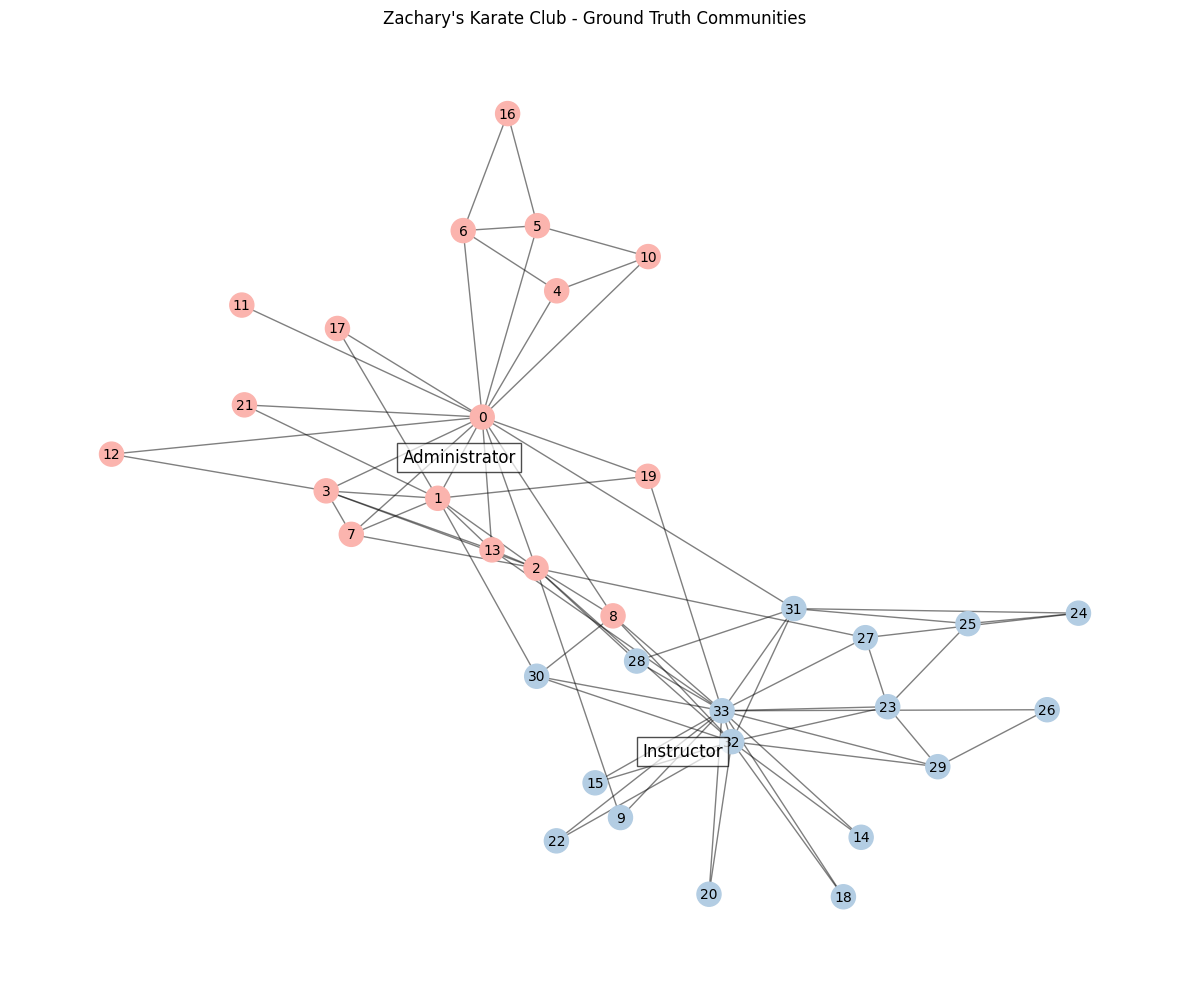

In [2]:
# Load Zachary's Karate Club network
G = nx.karate_club_graph()

# Get the ground truth: which club each member actually joined
club1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21]
club2 = [9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

# Create a color map for ground truth visualization using Pastel1 colormap
pastel_colors = plt.cm.Pastel1.colors
ground_truth_colors = [pastel_colors[0] if node in club1 else pastel_colors[1] for node in G.nodes()]

# Visualize the original network with ground truth colors
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)  # For reproducible layout

# Draw nodes with actual club colors
nx.draw_networkx_nodes(G, pos, node_color=ground_truth_colors, node_size=300)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Add instructor and administrator labels
plt.text(pos[0][0]-0.1, pos[0][1]-0.1, "Administrator", fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
plt.text(pos[33][0]-0.1, pos[33][1]-0.1, "Instructor", fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

plt.title("Zachary's Karate Club - Ground Truth Communities")
plt.axis('off')
plt.tight_layout()
plt.show()

## 4. Implementing Label Propagation

Now let's apply the Label Propagation algorithm to the Karate Club network using NetworkX's implementation. We'll run the algorithm multiple times to demonstrate its non-deterministic nature.

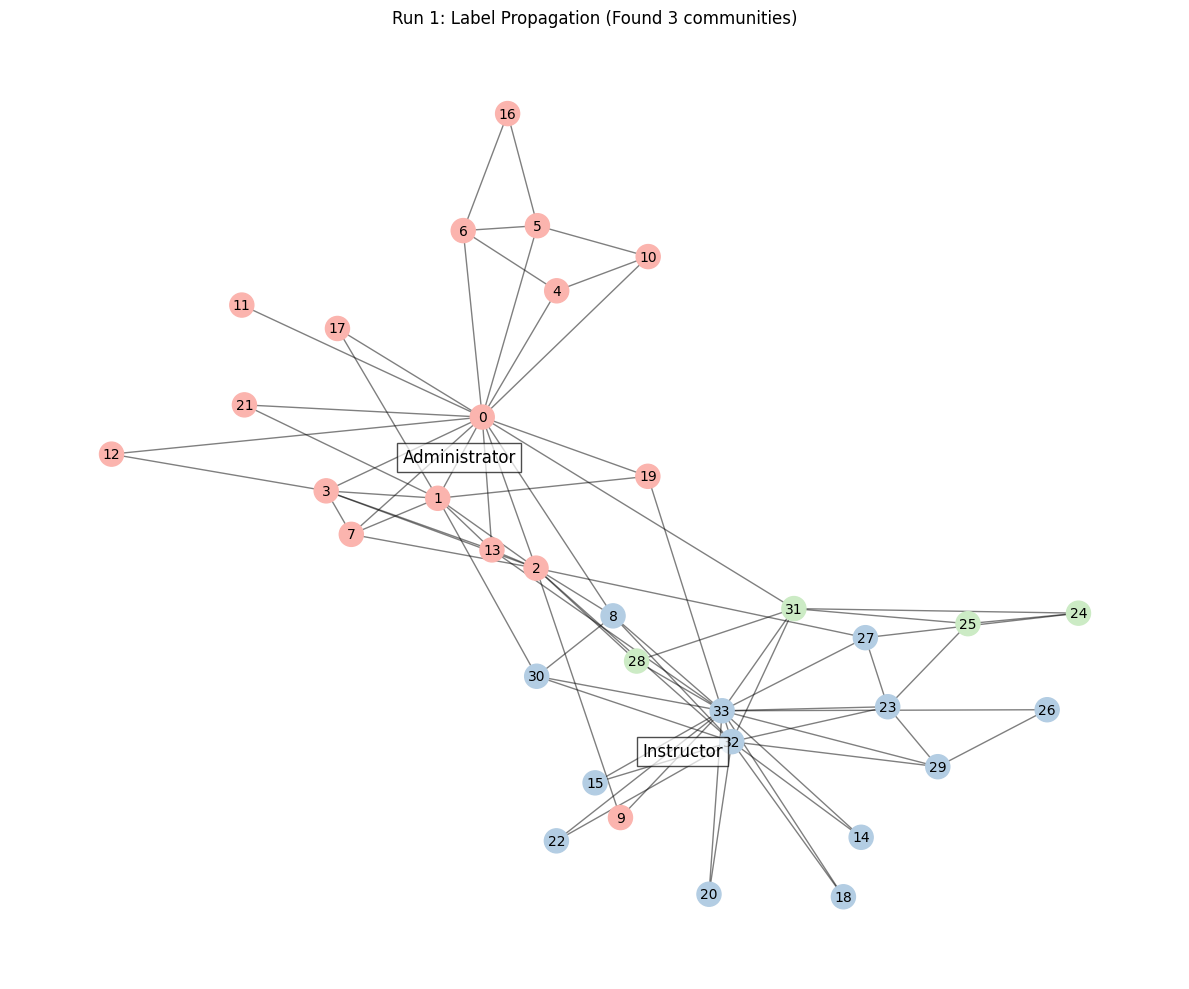

Run 1 Results:
Time taken: 0.0001 seconds
Number of communities detected: 3
Community sizes: [17, 13, 4]
Administrator and instructor in different communities: True
Communities: [[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21], [32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30], [24, 25, 28, 31]]

--------------------------------------------------------------------------------



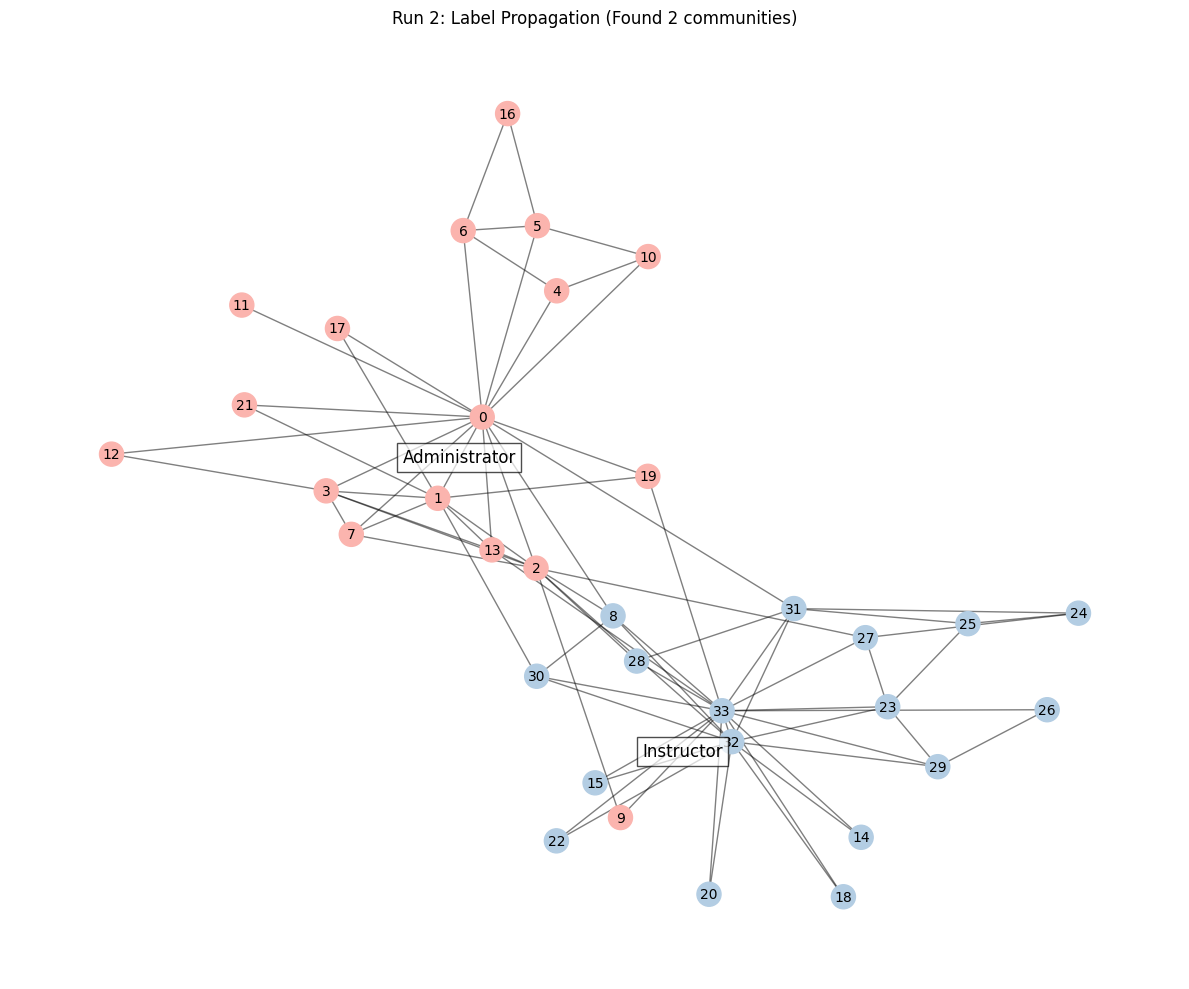

Run 2 Results:
Time taken: 0.0000 seconds
Number of communities detected: 2
Community sizes: [17, 17]
Administrator and instructor in different communities: True
Communities: [[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21], [32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]]

--------------------------------------------------------------------------------



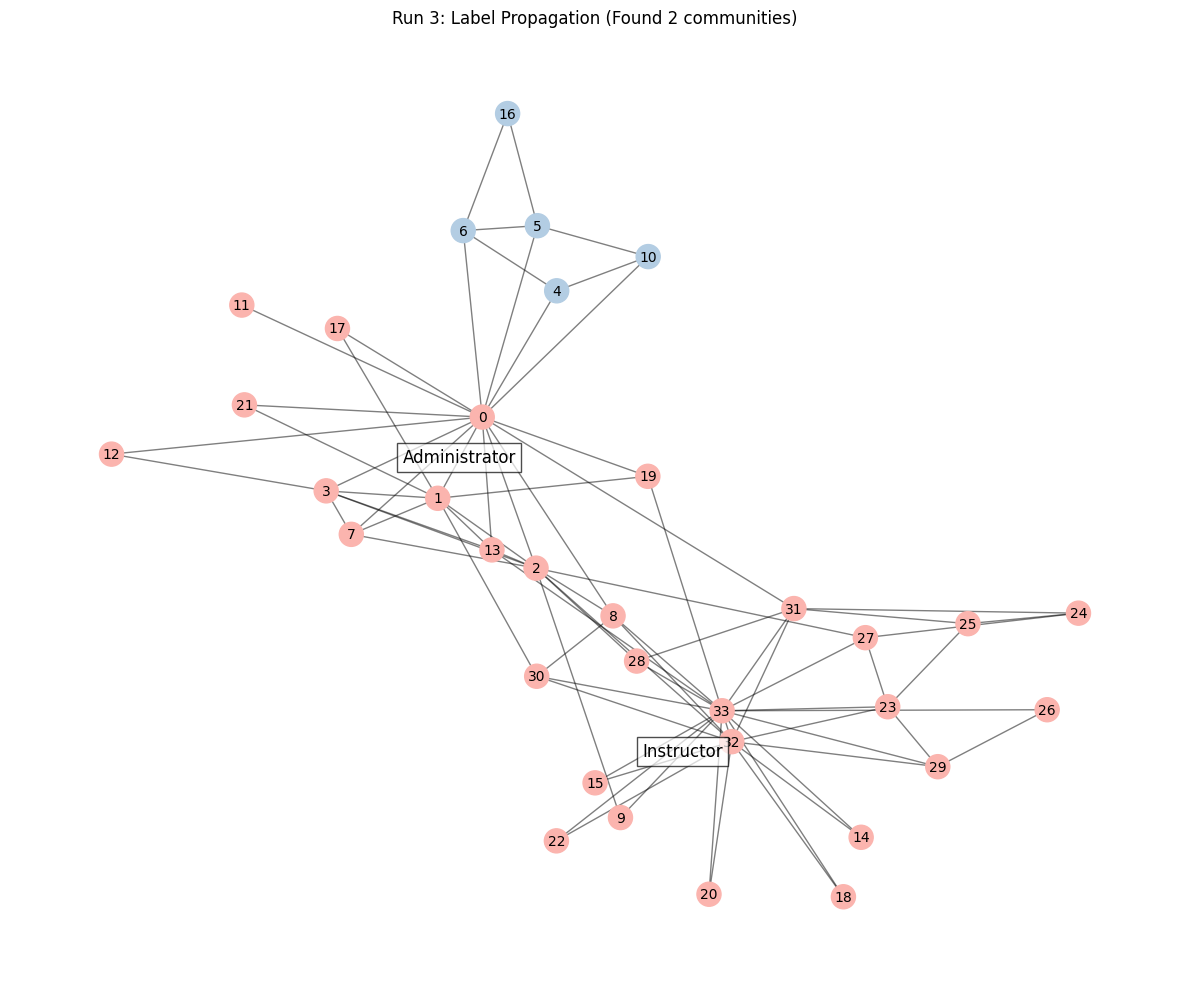

Run 3 Results:
Time taken: 0.0000 seconds
Number of communities detected: 2
Community sizes: [29, 5]
Administrator and instructor in different communities: False
Communities: [[0, 1, 2, 3, 7, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [4, 5, 6, 10, 16]]

--------------------------------------------------------------------------------



In [3]:
# Set a random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Function to apply label propagation and visualize results
def apply_and_visualize_lpa(G, pos, run_number):
    # Apply label propagation
    start_time = time.time()
    communities = nx.community.asyn_lpa_communities(G, seed=run_number)
    end_time = time.time()
    
    # Convert generator to list of sets
    community_sets = list(communities)
    
    # Create a dictionary mapping node -> community index
    community_map = {}
    for i, community in enumerate(community_sets):
        for node in community:
            community_map[node] = i
    
    # Create a color map for visualization
    # Use Pastel1 colormap for more appealing colors
    pastel_colors = plt.cm.Pastel1.colors
    # If we have more communities than colors, we'll cycle through them
    colors = [pastel_colors[i % len(pastel_colors)] for i in range(len(community_sets))]
    node_colors = [colors[community_map[node]] for node in G.nodes()]
    
    # Count members in each community
    community_sizes = [len(comm) for comm in community_sets]
    
    # Calculate accuracy compared to ground truth
    # This is a simplified measure - just checking if nodes 0 and 33 are in different communities
    admin_community = community_map[0]
    instructor_community = community_map[33]
    main_division_correct = admin_community != instructor_community
    
    # Visualize
    plt.figure(figsize=(12, 10))
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=300)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
    
    # Add instructor and administrator labels
    plt.text(pos[0][0]-0.1, pos[0][1]-0.1, "Administrator", fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
    plt.text(pos[33][0]-0.1, pos[33][1]-0.1, "Instructor", fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
    
    plt.title(f"Run {run_number}: Label Propagation (Found {len(community_sets)} communities)")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    print(f"Run {run_number} Results:")
    print(f"Time taken: {end_time - start_time:.4f} seconds")
    print(f"Number of communities detected: {len(community_sets)}")
    print(f"Community sizes: {community_sizes}")
    print(f"Administrator and instructor in different communities: {main_division_correct}")
    print(f"Communities: {[list(c) for c in community_sets]}")
    print("\n" + "-"*80 + "\n")
    
    return community_map, community_sets

# Run label propagation multiple times to show its non-deterministic nature
for run in range(1, 4):
    community_map, communities = apply_and_visualize_lpa(G, pos, run)

## 5. Analysis of Results

### Observations from Multiple Runs

As you can see from the multiple runs, the Label Propagation algorithm produces different results each time. This is due to:

1. **Random node ordering**: The algorithm processes nodes in random order during each iteration
2. **Random tie-breaking**: When a node has equal numbers of neighbors with different labels, one is chosen randomly
3. **Convergence paths**: Different initial random decisions lead to different paths toward convergence

### Comparison with Ground Truth

The actual Karate Club split into two communities (around nodes 0 and 33). Our LPA runs may detect:
- More than 2 communities (over-partitioning)
- Exactly 2 communities that may not perfectly match the real split
- Communities that generally separate the two leaders (administrator and instructor)

### Key Insights

1. **Speed**: Label propagation is extremely fast, even on larger networks
2. **Simplicity**: The algorithm requires no parameters or prior knowledge
3. **Variability**: Results can vary between runs
4. **Practical use**: For robust results, it's often recommended to run LPA multiple times and either:
   - Select the most common partition
   - Construct a consensus partition
   - Use the run with the highest quality score (e.g., modularity)

## 6. Custom Implementation to Understand the Algorithm

Let's implement a simple version of the Label Propagation algorithm ourselves to better understand how it works internally. This will help visualize the label changes at each step.

In [4]:
def custom_label_propagation(G, max_iterations=100, seed=None):
    """
    Improved Label Propagation algorithm that better matches NetworkX implementation
    """
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)
    
    # Initialize: each node gets a unique label
    labels = {node: node for node in G.nodes()}  # Use node ID as label like NetworkX does
    
    # Store history for visualization
    history = [labels.copy()]
    
    # Convergence tracking
    converged = False
    iteration = 0
    
    while not converged and iteration < max_iterations:
        # Track if any label changes in this iteration
        changes = 0
        
        # Process nodes in random order
        nodes = list(G.nodes())
        random.shuffle(nodes)
        
        # First pass: collect all label counts from neighbors
        label_counts = {}
        for node in nodes:
            if len(G[node]) == 0:  # Skip isolated nodes
                continue
                
            # Get neighbors' labels
            neighbor_labels = [labels[nbr] for nbr in G[node]]
            
            # Count frequency of each label
            counts = Counter(neighbor_labels)
            
            # Store the label counts for this node
            label_counts[node] = counts
        
        # Second pass: update all labels based on the counts from the first pass
        for node in nodes:
            if len(G[node]) == 0:  # Skip isolated nodes
                continue
                
            counts = label_counts[node]
            if not counts:  # Skip if no neighbors
                continue
                
            # Find the most frequent label(s)
            max_count = max(counts.values())
            most_common_labels = [label for label, count in counts.items() 
                                if count == max_count]
            
            # If current label is among the most common, keep it for stability
            if labels[node] in most_common_labels:
                continue
                
            # Choose one label randomly if there are multiple with max count
            new_label = random.choice(most_common_labels)
            
            # Update node's label
            if labels[node] != new_label:
                labels[node] = new_label
                changes += 1
        
        # Store the state at this iteration
        history.append(labels.copy())
        
        # Check for convergence
        if changes == 0:
            converged = True
            print(f"Converged after {iteration+1} iterations")
        
        iteration += 1
    
    if not converged:
        print(f"Did not fully converge after {max_iterations} iterations")
    
    # Convert node labels to community assignments
    communities = {}
    for node, label in labels.items():
        if label not in communities:
            communities[label] = set()
        communities[label].add(node)
    
    return labels, history


In [5]:
# Visualize the progression of label propagation
def visualize_label_propagation_steps(G, pos, history, max_steps=6):
    # Calculate how many steps to show (all if <= max_steps, otherwise evenly spaced)
    num_steps = len(history)
    if num_steps <= max_steps:
        steps_to_show = range(num_steps)
    else:
        # Show first, last, and evenly spaced steps in between
        steps_to_show = [0] + list(range(1, num_steps-1, (num_steps-2) // (max_steps-2))) + [num_steps-1]
        steps_to_show = sorted(set(steps_to_show))[:max_steps]
    
    rows = (len(steps_to_show) + 1)   # Ceiling division to get number of rows
    fig, axes = plt.subplots(rows, 1, figsize=(8, 8*rows), squeeze=False)
    axes = axes.flatten()
    
    for i, step in enumerate(steps_to_show):
        ax = axes[i]
        
        # Get labels at this step
        step_labels = history[step]
        
        # Count unique labels
        unique_labels = set(step_labels.values())
        
        # Create color map using Pastel1
        pastel_colors = plt.cm.Pastel1.colors
        colors = [pastel_colors[i % len(pastel_colors)] for i in range(len(unique_labels))]
        color_map = {label: colors[i] for i, label in enumerate(unique_labels)}
        
        # Assign colors to nodes
        node_colors = [color_map[step_labels[node]] for node in G.nodes()]
        
        # Draw the network
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=200, ax=ax)
        nx.draw_networkx_edges(G, pos, alpha=0.3, ax=ax)
        
        # Show node labels in all plots
        nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', ax=ax)
            
        # Set title
        if step == len(history) - 1:
            ax.set_title(f"Final state\n({len(unique_labels)} communities)")
        else:
            ax.set_title(f"Iteration {step}\n({len(unique_labels)} communities)")
        
        ax.axis('off')
    
    # Hide any unused subplots
    for i in range(len(steps_to_show), len(axes)):
        fig.delaxes(axes[i])
        
    plt.tight_layout()
    plt.suptitle("Label Propagation Algorithm Progression", fontsize=16)
    plt.subplots_adjust(top=0.95)
    plt.show()

Converged after 9 iterations


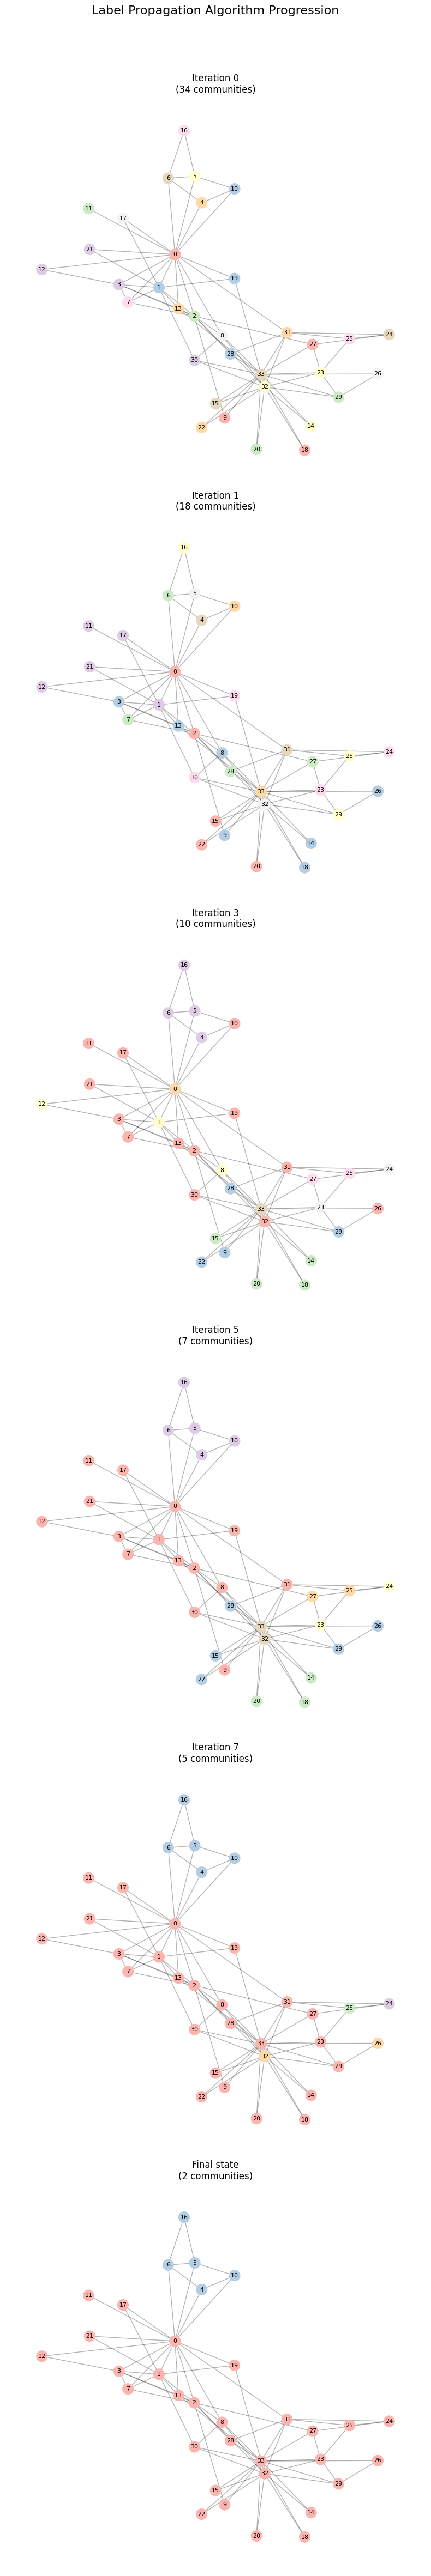

In [6]:
# Apply the custom implementation
labels, history = custom_label_propagation(G, seed=42)

# Visualize the progression
visualize_label_propagation_steps(G, pos, history)

## 7. Advanced Topics and Limitations

### Variations of Label Propagation

1. **Semi-supervised Label Propagation**
   - Some nodes have fixed, known labels from the beginning
   - These "seed" labels propagate to unlabeled nodes

2. **Weighted Label Propagation**
   - Labels of neighbors connected by stronger edges have more influence

3. **Speaker-Listener Label Propagation (SLPA)**
   - Allows nodes to have multiple labels
   - Better captures overlapping communities

### Limitations of Label Propagation

1. **Non-deterministic results**
   - Different runs can produce different communities
   - Solutions depend on random node ordering and tie-breaking

2. **Stability issues**
   - The algorithm may oscillate between solutions in some networks

3. **Resolution limit**
   - May struggle to detect small communities in large networks

4. **Simple decision rule**
   - The majority voting mechanism is simple but may miss subtle community structures

### When to Use Label Propagation

Label propagation is an excellent choice when:
- You need a fast, scalable algorithm for large networks
- You don't have prior knowledge about the number of communities
- The community structure is relatively clear
- You can afford to run the algorithm multiple times

## 8. Conclusion and Further Study

### Key Takeaways

1. **Label Propagation Principle**:
   - Communities form naturally through local interaction rules
   - Simple majority voting can effectively identify complex structures

2. **Algorithm Properties**:
   - Fast (near-linear time complexity)
   - Parameter-free
   - Non-deterministic
   - Scalable to very large networks

3. **Practical Use**:
   - Run multiple times to ensure robust results
   - Consider ensemble approaches for stability
   - Well-suited for large-scale networks

### Further Reading

1. [Original Paper: Near linear time algorithm to detect community structures in large-scale networks](https://arxiv.org/abs/0709.2938)
2. [Label Propagation with Overlapping Communities (COPRA)](https://arxiv.org/abs/0910.5516)
3. [Speaker-listener Label Propagation Algorithm (SLPA)](https://arxiv.org/abs/1109.5720)
4. [Semi-supervised learning with Label Propagation](https://link.springer.com/chapter/10.1007/978-3-540-30115-8_22)

### Assignments for Practice

1. Apply Label Propagation to other standard network datasets (e.g., football network, political blogs)
2. Implement a consensus clustering approach by combining results from multiple LPA runs
3. Compare LPA with other community detection algorithms quantitatively using metrics like Normalized Mutual Information (NMI)
4. Explore how network properties (density, clustering coefficient) affect LPA performance

## 9. References

1. Raghavan, U. N., Albert, R., & Kumara, S. (2007). Near linear time algorithm to detect community structures in large-scale networks. Physical review E, 76(3), 036106.

2. Cordasco, G., & Gargano, L. (2010). Community detection via semi-synchronous label propagation algorithms. In 2010 IEEE International Workshop on: Business Applications of Social Network Analysis (BASNA) (pp. 1-8). IEEE.

3. Xie, J., & Szymanski, B. K. (2013). LabelRank: A stabilized label propagation algorithm for community detection in networks. In 2013 IEEE 2nd Network Science Workshop (NSW) (pp. 138-143). IEEE.

4. Newman, M. E. (2006). Modularity and community structure in networks. Proceedings of the national academy of sciences, 103(23), 8577-8582.

5. Blondel, V. D., Guillaume, J. L., Lambiotte, R., & Lefebvre, E. (2008). Fast unfolding of communities in large networks. Journal of statistical mechanics: theory and experiment, 2008(10), P10008.